<a href="https://colab.research.google.com/github/godinezseba/Tarea-2-RedesNeuronales/blob/master/notebooks/Parte%201/Taller2_Parte1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Dataset: [The Simpsons character classification](https://www.kaggle.com/jfgm2018/the-simpsons-dataset-compilation-49-characters)

In [ ]:
%cd Documents/USM/NN
!git clone https://github.com/godinezseba/Tarea-2-RedesNeuronales

[Errno 2] No such file or directory: 'Documents/USM/NN'
/content
Cloning into 'Tarea-2-RedesNeuronales'...
remote: Enumerating objects: 2149, done.
remote: Counting objects: 100% (2149/2149), done.
remote: Compressing objects: 100% (2149/2149), done.
remote: Total 35837 (delta 0), reused 2148 (delta 0), pack-reused 33688
Receiving objects: 100% (35837/35837), 797.54 MiB | 20.14 MiB/s, done.
Resolving deltas: 100% (324/324), done.
Checking out files: 100% (36723/36723), done.


#### Pre procesamiento:

Dada la diferencia de datos que se tiene por personaje, primero se grafica la cantidad de imagenes que se tienen por personaje para luego eliminar a los personajes con menor cantidad de imagenes. A pesar de disminuir la cantidad de imagenes a trabajar, se busca con esto balancear las clases a entrenar.

In [ ]:
# name of the folders
original_target_names = ['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'brandine_spuckler','carl_carlson', 
                  'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler','comic_book_guy', 'disco_stu', 'dolph_starbeam','duff_man','edna_krabappel', 
                  'fat_tony', 'gary_chalmers','gil', 'groundskeeper_willie', 'homer_simpson','jimbo_jones', 'kearney_zzyzwicz','kent_brockman', 'krusty_the_clown', 'lenny_leonard', 
                  'lionel_hutz', 'lisa_simpson', 'lunchlady_doris','maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby','milhouse_van_houten', 
                  'miss_hoover', 'moe_szyslak', 'ned_flanders','nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 
                  'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum','selma_bouvier', 'sideshow_bob', 'sideshow_mel', 
                  'snake_jailbird','troy_mcclure', 'waylon_smithers']
len(original_target_names)

49

In [ ]:
import os, os.path

original_number_files = []
# get number of images per folder
for simpson in original_target_names:
  DIR = f'./Tarea-2-RedesNeuronales/datasets/Parte 1/simpsons/simpsons_dataset/{simpson}'
  len_folder = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
  original_number_files.append(len_folder)

Con estos datos primero se hace una grafica de barras para saber la cantidad de imagens de cada dataset y luego un boxplot para visualizar mejor la distribución de estos.

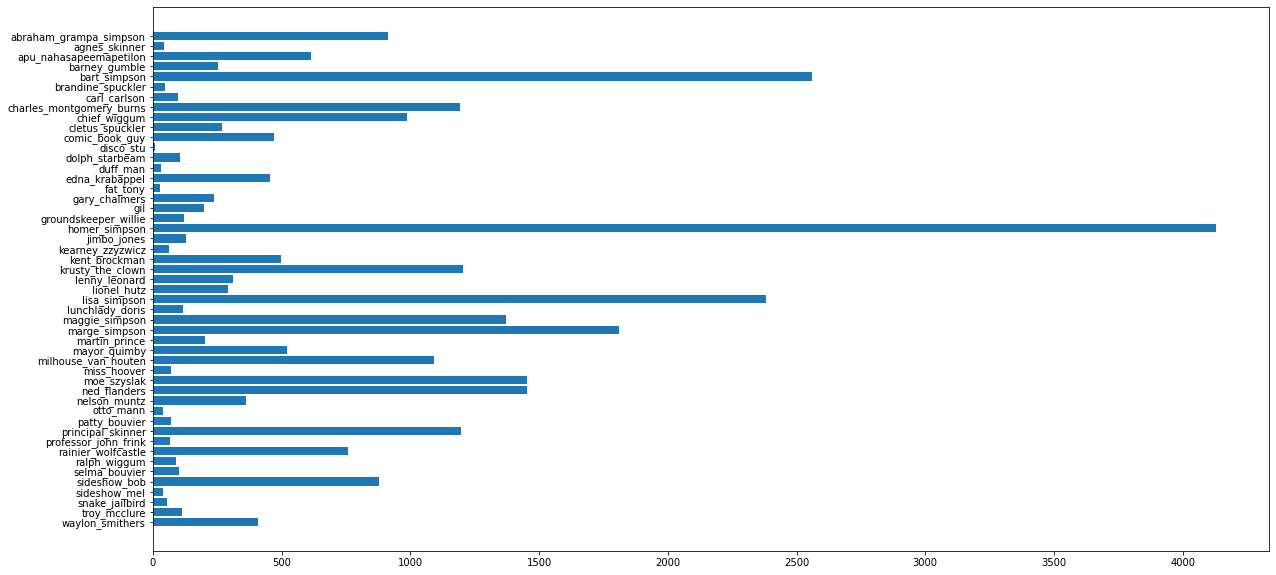

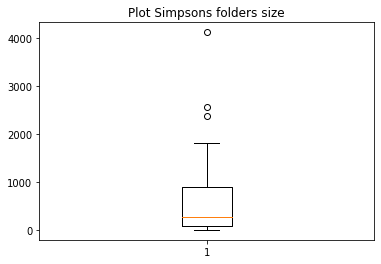

In [ ]:
def plotNumberFiles(target_names, number_files, size=(20, 10)):
  fig, ax = plt.subplots(figsize=size)
  ax.barh(target_names, number_files)
  ax.invert_yaxis()
  
  fig, ax = plt.subplots()
  ax.set_title('Plot Simpsons folders size')
  ax.boxplot(number_files)
  plt.show()

plotNumberFiles(original_target_names, original_number_files)

Con esto se utilizara como criterio de eliminación los personajes con menos de mil imagenes.

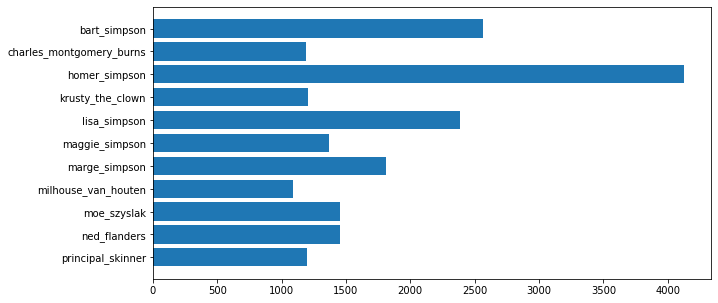

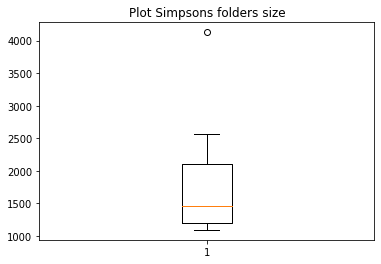

In [ ]:
prune_target = dict()
# get number of images per folder
for simpson in original_target_names:
  DIR = f'./Tarea-2-RedesNeuronales/datasets/Parte 1/simpsons/simpsons_dataset/{simpson}'
  len_folder = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
  if(len_folder > 1000):
    prune_target[simpson] = len_folder

plotNumberFiles(list(prune_target.keys()), list(prune_target.values()), size=(10, 5))

In [ ]:
import functools
len_classes = len(prune_target.keys())
print(f'Cantidad de clases: {len_classes}')

len_files = functools.reduce(lambda a, b : a + b, prune_target.values())
print(f'Cantidad de imagenes: {len_files}')

Cantidad de clases: 11
Cantidad de imagenes: 19845


Con esto se tiene un total de 11 clases y aproximadamente 20 mil imagenes. Luego de esto se genera los dataset mediante keras:

In [ ]:
train_path = './Tarea-2-RedesNeuronales/datasets/Parte 1/simpsons/simpsons_dataset'
test_path = './Tarea-2-RedesNeuronales/datasets/Parte 1/simpsons/simpsons_testdataset'

img_size = (64, 64, 3)
batch_size = 128
num_of_train_samples = 17864
num_of_val_samples = 1981
num_of_test_samples = 1554

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.1)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    classes=prune_target.keys(),
                                                    target_size=(img_size[0], img_size[1]),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_path,
                                                    classes=prune_target.keys(),
                                                    target_size=(img_size[0], img_size[1]),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='validation')

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                  classes=prune_target.keys(),
                                                  target_size=(img_size[0], img_size[1]),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 17864 images belonging to 11 classes.
Found 1981 images belonging to 11 classes.
Found 1554 images belonging to 11 classes.


#### [F1 Score](https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model)

Dado que Keras no lo tiene implementado por defecto definimos f1 score:

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### Modelo de referencia

Con el fin de comparar resultado se utiliza un modelo de [Kaggle](https://www.kaggle.com/jfgm2018/kernel23acbaf266)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=img_size))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(len_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', f1_m])

##### Entrenamiento

In [ ]:
import os.path
def training(model, checkpoint_filepath, epochs=80):
  DIR = f'./drive/My Drive/Colab Notebooks/Tarea 2-Simpsons/{checkpoint_filepath}'
  checkpoint = ModelCheckpoint(DIR, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
  history = model.fit(train_generator,
                      steps_per_epoch=num_of_train_samples // batch_size,
                      epochs=epochs,
                      validation_data=validation_generator,
                      validation_steps=num_of_val_samples // batch_size,
                      callbacks=[checkpoint],
                      verbose=1)
  
  model.load_weights(DIR)
  return model, history

In [ ]:
epochs = 80
checkpoint_filepath = 'model_kaggle.h5'

model, history = training(model, checkpoint_filepath, epochs)

Epoch 1/80
139/139 [==============================] - ETA: 0s - loss: 1.5434 - accuracy: 0.4888 - f1_m: 0.4485
Epoch 00001: val_accuracy improved from -inf to 0.20625, saving model to ./drive/My Drive/Colab Notebooks/model_kaggle.h5
139/139 [==============================] - 75s 538ms/step - loss: 1.5434 - accuracy: 0.4888 - f1_m: 0.4485 - val_loss: 2.9330 - val_accuracy: 0.2062 - val_f1_m: 0.1048
Epoch 2/80
139/139 [==============================] - ETA: 0s - loss: 0.8790 - accuracy: 0.7159 - f1_m: 0.7081
Epoch 00002: val_accuracy improved from 0.20625 to 0.29531, saving model to ./drive/My Drive/Colab Notebooks/model_kaggle.h5
139/139 [==============================] - 71s 510ms/step - loss: 0.8790 - accuracy: 0.7159 - f1_m: 0.7081 - val_loss: 2.4810 - val_accuracy: 0.2953 - val_f1_m: 0.2262
Epoch 3/80
139/139 [==============================] - ETA: 0s - loss: 0.6556 - accuracy: 0.7908 - f1_m: 0.7903
Epoch 00003: val_accuracy improved from 0.29531 to 0.35573, saving model to ./drive/

##### Evaluación
Luego de entrenar se despliega el comportamiento de este en el tiempo y su desempeño con el dataset de prueba.

In [ ]:
def plotHistory(history):
  plt.figure(figsize=(10,5))
  plt.subplot(1, 2, 1)
  plt.suptitle('Optimizer : Adam', fontsize=10)
  plt.ylabel('Loss', fontsize=16)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.legend(loc='upper right')

  plt.subplot(1, 2, 2)
  plt.ylabel('Accuracy', fontsize=16)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.show()

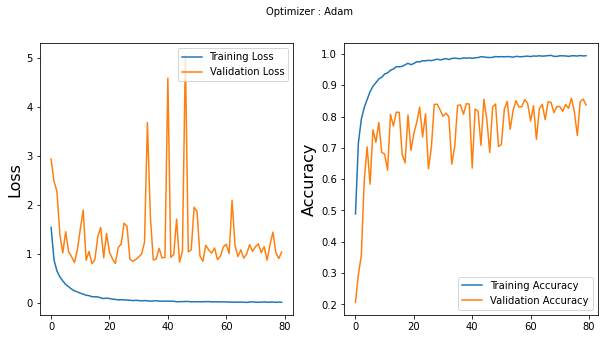

In [ ]:
plotHistory(history)

In [ ]:
from sklearn.metrics import classification_report

def predict(model):
  predictions = model.predict(test_generator, verbose=0)
  y = np.argmax(predictions, axis=-1)
  print(classification_report(test_generator.classes , y))

def evaluate(model):
  loss, accuracy, f1_score = model.evaluate(test_generator, verbose=0)

  print(f'Loss obtenida para el test: {loss}')
  print(f'Accuracy obtenida para el test: {accuracy}')
  print(f'f1 score obtenida para el test: {f1_score}')

In [ ]:
evaluate(model)
predict(model)

Loss obtenida para el test: 0.21458928287029266
Accuracy obtenida para el test: 0.9362934231758118
f1 score obtenida para el test: 0.9368321895599365
              precision    recall  f1-score   support

           0       0.15      0.17      0.16       261
           1       0.06      0.06      0.06        48
           2       0.26      0.22      0.24       306
           3       0.02      0.02      0.02        50
           4       0.14      0.17      0.15       222
           5       0.10      0.07      0.09       162
           6       0.18      0.18      0.18       307
           7       0.04      0.04      0.04        49
           8       0.02      0.02      0.02        50
           9       0.02      0.02      0.02        49
          10       0.00      0.00      0.00        50

    accuracy                           0.14      1554
   macro avg       0.09      0.09      0.09      1554
weighted avg       0.15      0.14      0.14      1554



#### Modelo Base

Este modelo sera el que modificaremos para agregar/quitar capas Dropout y BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv2D(64, 3, padding='same', input_shape=img_size))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, padding='same')) 
model.add(Activation('relu'))
model.add(Conv2D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, padding='same')) 
model.add(Activation('relu'))
model.add(Conv2D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(len_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', f1_m])

##### Entrenamiento

In [ ]:
epochs = 80
checkpoint_filepath = 'model_base.h5'

model, history = training(model, checkpoint_filepath, epochs)

Epoch 1/80
139/139 [==============================] - ETA: 0s - loss: 2.0619 - accuracy: 0.2566 - f1_m: 0.1022
Epoch 00001: val_accuracy improved from -inf to 0.27552, saving model to ./drive/My Drive/Colab Notebooks/model_base.h5
139/139 [==============================] - 69s 499ms/step - loss: 2.0619 - accuracy: 0.2566 - f1_m: 0.1022 - val_loss: 2.0057 - val_accuracy: 0.2755 - val_f1_m: 0.1557
Epoch 2/80
139/139 [==============================] - ETA: 0s - loss: 1.4766 - accuracy: 0.4742 - f1_m: 0.3694
Epoch 00002: val_accuracy improved from 0.27552 to 0.39427, saving model to ./drive/My Drive/Colab Notebooks/model_base.h5
139/139 [==============================] - 69s 496ms/step - loss: 1.4766 - accuracy: 0.4742 - f1_m: 0.3694 - val_loss: 2.1132 - val_accuracy: 0.3943 - val_f1_m: 0.3538
Epoch 3/80
139/139 [==============================] - ETA: 0s - loss: 1.0931 - accuracy: 0.6083 - f1_m: 0.5744
Epoch 00003: val_accuracy improved from 0.39427 to 0.49635, saving model to ./drive/My D

##### Evaluación

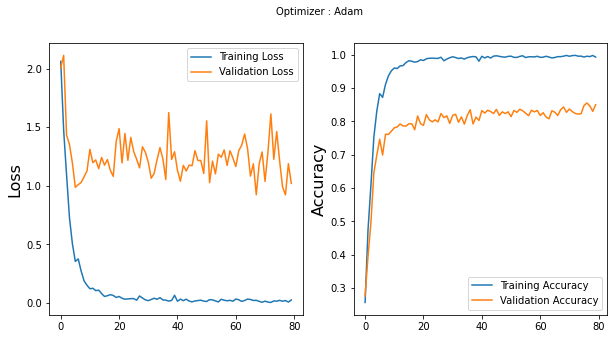

In [ ]:
plotHistory(history)

In [ ]:
evaluate(model)
predict(model)

Loss obtenida para el test: 0.36819836497306824
Accuracy obtenida para el test: 0.9478764533996582
f1 score obtenida para el test: 0.94732666015625
              precision    recall  f1-score   support

           0       0.15      0.19      0.17       261
           1       0.09      0.08      0.09        48
           2       0.22      0.23      0.22       306
           3       0.06      0.06      0.06        50
           4       0.12      0.12      0.12       222
           5       0.11      0.06      0.08       162
           6       0.17      0.17      0.17       307
           7       0.06      0.06      0.06        49
           8       0.06      0.06      0.06        50
           9       0.02      0.02      0.02        49
          10       0.02      0.02      0.02        50

    accuracy                           0.14      1554
   macro avg       0.10      0.10      0.10      1554
weighted avg       0.14      0.14      0.14      1554



#### Modelo con Dropout

Como estandar todos los Dropout() seran de 0.25.

##### Dropout antes de pooling

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=img_size))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(len_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', f1_m])

In [ ]:
epochs = 80
checkpoint_filepath = 'model_dropout_pooling.h5'

model, history = training(model, checkpoint_filepath, epochs)

Epoch 1/80
139/139 [==============================] - ETA: 0s - loss: 1.9947 - accuracy: 0.2907 - f1_m: 0.1341
Epoch 00001: val_accuracy improved from -inf to 0.31042, saving model to ./drive/My Drive/Colab Notebooks/model_dropout_pooling.h5
139/139 [==============================] - 69s 500ms/step - loss: 1.9947 - accuracy: 0.2907 - f1_m: 0.1341 - val_loss: 1.9851 - val_accuracy: 0.3104 - val_f1_m: 0.0925
Epoch 2/80
139/139 [==============================] - ETA: 0s - loss: 1.2866 - accuracy: 0.5460 - f1_m: 0.4752
Epoch 00002: val_accuracy improved from 0.31042 to 0.47188, saving model to ./drive/My Drive/Colab Notebooks/model_dropout_pooling.h5
139/139 [==============================] - 71s 512ms/step - loss: 1.2866 - accuracy: 0.5460 - f1_m: 0.4752 - val_loss: 1.6626 - val_accuracy: 0.4719 - val_f1_m: 0.3495
Epoch 3/80
139/139 [==============================] - ETA: 0s - loss: 0.7871 - accuracy: 0.7332 - f1_m: 0.7252
Epoch 00003: val_accuracy improved from 0.47188 to 0.60573, saving

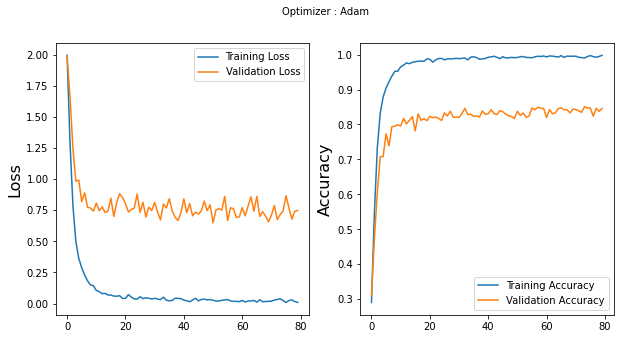

In [ ]:
plotHistory(history)

In [ ]:
evaluate(model)
predict(model)

Loss obtenida para el test: 0.16062580049037933
Accuracy obtenida para el test: 0.9665379524230957
f1 score obtenida para el test: 0.9599252343177795
              precision    recall  f1-score   support

           0       0.16      0.18      0.17       261
           1       0.02      0.02      0.02        48
           2       0.20      0.20      0.20       306
           3       0.02      0.02      0.02        50
           4       0.17      0.17      0.17       222
           5       0.10      0.07      0.08       162
           6       0.22      0.21      0.21       307
           7       0.02      0.02      0.02        49
           8       0.02      0.02      0.02        50
           9       0.02      0.02      0.02        49
          10       0.04      0.04      0.04        50

    accuracy                           0.15      1554
   macro avg       0.09      0.09      0.09      1554
weighted avg       0.15      0.15      0.15      1554



##### Dropout entre no linealidad y convolución

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=img_size))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(len_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', f1_m])

In [ ]:
epochs = 80
checkpoint_filepath = 'model_dropout_entre.h5'

model, history = training(model, checkpoint_filepath, epochs)

Epoch 1/80
139/139 [==============================] - ETA: 0s - loss: 2.1439 - accuracy: 0.2486 - f1_m: 0.1004
Epoch 00001: val_accuracy improved from -inf to 0.19167, saving model to ./drive/My Drive/Colab Notebooks/model_dropout_entre.h5
139/139 [==============================] - 70s 506ms/step - loss: 2.1439 - accuracy: 0.2486 - f1_m: 0.1004 - val_loss: 2.2303 - val_accuracy: 0.1917 - val_f1_m: 0.0481
Epoch 2/80
139/139 [==============================] - ETA: 0s - loss: 1.5133 - accuracy: 0.4535 - f1_m: 0.3602
Epoch 00002: val_accuracy improved from 0.19167 to 0.30208, saving model to ./drive/My Drive/Colab Notebooks/model_dropout_entre.h5
139/139 [==============================] - 71s 511ms/step - loss: 1.5133 - accuracy: 0.4535 - f1_m: 0.3602 - val_loss: 2.0307 - val_accuracy: 0.3021 - val_f1_m: 0.2079
Epoch 3/80
139/139 [==============================] - ETA: 0s - loss: 1.0887 - accuracy: 0.6174 - f1_m: 0.5807
Epoch 00003: val_accuracy improved from 0.30208 to 0.42708, saving mod

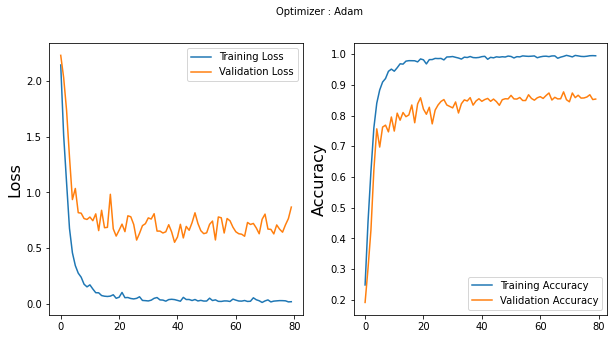

In [ ]:
plotHistory(history)

In [ ]:
evaluate(model)
predict(model)

Loss obtenida para el test: 0.09909386187791824
Accuracy obtenida para el test: 0.9742599725723267
f1 score obtenida para el test: 0.976992666721344
              precision    recall  f1-score   support

           0       0.15      0.16      0.16       261
           1       0.04      0.04      0.04        48
           2       0.18      0.18      0.18       306
           3       0.00      0.00      0.00        50
           4       0.13      0.13      0.13       222
           5       0.09      0.08      0.09       162
           6       0.15      0.15      0.15       307
           7       0.02      0.02      0.02        49
           8       0.02      0.02      0.02        50
           9       0.00      0.00      0.00        49
          10       0.00      0.00      0.00        50

    accuracy                           0.12      1554
   macro avg       0.07      0.07      0.07      1554
weighted avg       0.12      0.12      0.12      1554



##### Dropout antes de la convolución

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=img_size))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(len_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', f1_m])

In [ ]:
epochs = 80
checkpoint_filepath = 'model_dropout_convolucion.h5'

model, history = training(model, checkpoint_filepath, epochs)

Epoch 1/80
139/139 [==============================] - ETA: 0s - loss: 2.1222 - accuracy: 0.2363 - f1_m: 0.0894
Epoch 00001: val_accuracy improved from -inf to 0.10365, saving model to ./drive/My Drive/Colab Notebooks/model_dropout_convolucion.h5
139/139 [==============================] - 70s 501ms/step - loss: 2.1222 - accuracy: 0.2363 - f1_m: 0.0894 - val_loss: 2.4511 - val_accuracy: 0.1036 - val_f1_m: 0.0000e+00
Epoch 2/80
139/139 [==============================] - ETA: 0s - loss: 1.8170 - accuracy: 0.3416 - f1_m: 0.2147
Epoch 00002: val_accuracy improved from 0.10365 to 0.35781, saving model to ./drive/My Drive/Colab Notebooks/model_dropout_convolucion.h5
139/139 [==============================] - 71s 507ms/step - loss: 1.8170 - accuracy: 0.3416 - f1_m: 0.2147 - val_loss: 2.1989 - val_accuracy: 0.3578 - val_f1_m: 0.1885
Epoch 3/80
139/139 [==============================] - ETA: 0s - loss: 1.2698 - accuracy: 0.5532 - f1_m: 0.4990
Epoch 00003: val_accuracy improved from 0.35781 to 0.3

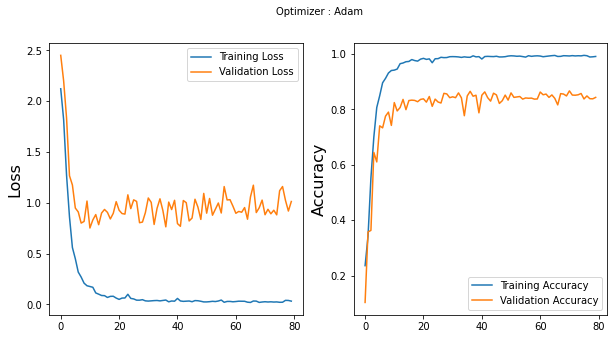

In [ ]:
plotHistory(history)

In [ ]:
evaluate(model)
predict(model)

Loss obtenida para el test: 0.113739512860775
Accuracy obtenida para el test: 0.976190447807312
f1 score obtenida para el test: 0.9788906574249268
              precision    recall  f1-score   support

           0       0.16      0.17      0.17       261
           1       0.06      0.06      0.06        48
           2       0.19      0.20      0.20       306
           3       0.04      0.04      0.04        50
           4       0.09      0.09      0.09       222
           5       0.11      0.09      0.10       162
           6       0.17      0.17      0.17       307
           7       0.00      0.00      0.00        49
           8       0.06      0.06      0.06        50
           9       0.04      0.04      0.04        49
          10       0.00      0.00      0.00        50

    accuracy                           0.13      1554
   macro avg       0.08      0.08      0.08      1554
weighted avg       0.13      0.13      0.13      1554



#### Modelo con Batchnormalization

##### Batchnormalization antes de la convolucion

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=img_size))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(len_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', f1_m])

In [ ]:
epochs = 80
checkpoint_filepath = 'model_batchnormalization_antes.h5'

model, history = training(model, checkpoint_filepath, epochs)

Epoch 1/80
139/139 [==============================] - ETA: 0s - loss: 2.2072 - accuracy: 0.3618 - f1_m: 0.2653
Epoch 00001: val_accuracy improved from -inf to 0.07344, saving model to ./drive/My Drive/Colab Notebooks/model_batchnormalization_antes.h5
139/139 [==============================] - 70s 504ms/step - loss: 2.2072 - accuracy: 0.3618 - f1_m: 0.2653 - val_loss: 2.9226 - val_accuracy: 0.0734 - val_f1_m: 0.0246
Epoch 2/80
139/139 [==============================] - ETA: 0s - loss: 1.0976 - accuracy: 0.6265 - f1_m: 0.6028
Epoch 00002: val_accuracy improved from 0.07344 to 0.27135, saving model to ./drive/My Drive/Colab Notebooks/model_batchnormalization_antes.h5
139/139 [==============================] - 70s 505ms/step - loss: 1.0976 - accuracy: 0.6265 - f1_m: 0.6028 - val_loss: 2.3078 - val_accuracy: 0.2714 - val_f1_m: 0.0442
Epoch 3/80
139/139 [==============================] - ETA: 0s - loss: 0.7210 - accuracy: 0.7626 - f1_m: 0.7632
Epoch 00003: val_accuracy improved from 0.27135 

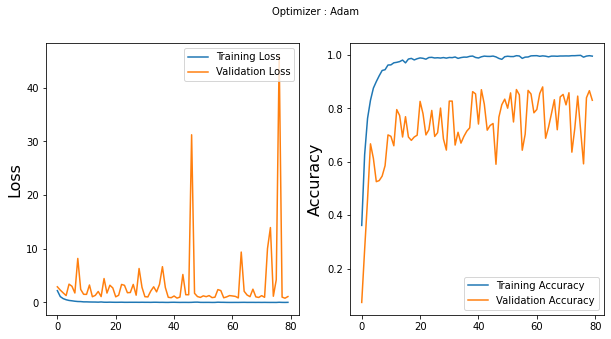

In [ ]:
plotHistory(history)

In [ ]:
evaluate(model)
predict(model)

Loss obtenida para el test: 0.1291632503271103
Accuracy obtenida para el test: 0.9697554707527161
f1 score obtenida para el test: 0.9683768153190613
              precision    recall  f1-score   support

           0       0.17      0.19      0.18       261
           1       0.07      0.06      0.06        48
           2       0.24      0.22      0.23       306
           3       0.02      0.02      0.02        50
           4       0.14      0.15      0.14       222
           5       0.13      0.12      0.12       162
           6       0.22      0.22      0.22       307
           7       0.02      0.02      0.02        49
           8       0.06      0.06      0.06        50
           9       0.02      0.02      0.02        49
          10       0.00      0.00      0.00        50

    accuracy                           0.16      1554
   macro avg       0.10      0.10      0.10      1554
weighted avg       0.16      0.16      0.16      1554



##### Batchnormalization entre no linealidad y convolucion

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=img_size))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(len_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', f1_m])

In [ ]:
epochs = 80
checkpoint_filepath = 'model_batchnormalization_linealidad.h5'

model, history = training(model, checkpoint_filepath, epochs)

Epoch 1/80
139/139 [==============================] - ETA: 0s - loss: 2.4425 - accuracy: 0.2882 - f1_m: 0.1549
Epoch 00001: val_accuracy improved from -inf to 0.13750, saving model to ./drive/My Drive/Colab Notebooks/model_batchnormalization_linealidad.h5
139/139 [==============================] - 96s 687ms/step - loss: 2.4425 - accuracy: 0.2882 - f1_m: 0.1549 - val_loss: 2.5142 - val_accuracy: 0.1375 - val_f1_m: 0.0000e+00
Epoch 2/80
139/139 [==============================] - ETA: 0s - loss: 1.2748 - accuracy: 0.5681 - f1_m: 0.5064
Epoch 00002: val_accuracy improved from 0.13750 to 0.26198, saving model to ./drive/My Drive/Colab Notebooks/model_batchnormalization_linealidad.h5
139/139 [==============================] - 95s 680ms/step - loss: 1.2748 - accuracy: 0.5681 - f1_m: 0.5064 - val_loss: 2.7240 - val_accuracy: 0.2620 - val_f1_m: 0.1835
Epoch 3/80
139/139 [==============================] - ETA: 0s - loss: 0.7979 - accuracy: 0.7383 - f1_m: 0.7338
Epoch 00003: val_accuracy improved

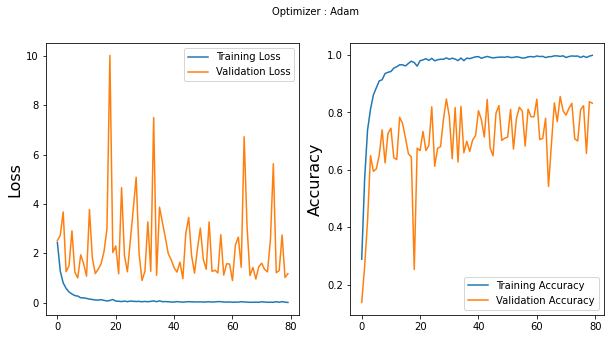

In [ ]:
plotHistory(history)

In [ ]:
evaluate(model)
predict(model)

Loss obtenida para el test: 2.0456461906433105
Accuracy obtenida para el test: 0.8449163436889648
f1 score obtenida para el test: 0.847478985786438
              precision    recall  f1-score   support

           0       0.19      0.35      0.25       261
           1       0.02      0.02      0.02        48
           2       0.22      0.22      0.22       306
           3       0.04      0.04      0.04        50
           4       0.15      0.10      0.12       222
           5       0.10      0.01      0.01       162
           6       0.22      0.22      0.22       307
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00        50
           9       0.02      0.02      0.02        49
          10       0.00      0.00      0.00        50

    accuracy                           0.16      1554
   macro avg       0.09      0.09      0.08      1554
weighted avg       0.15      0.16      0.15      1554



#### Combinación
La combinación escogida para este dataset es utilizar BatchNormalization entre la capa convolucional y 

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(11, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', f1_m])

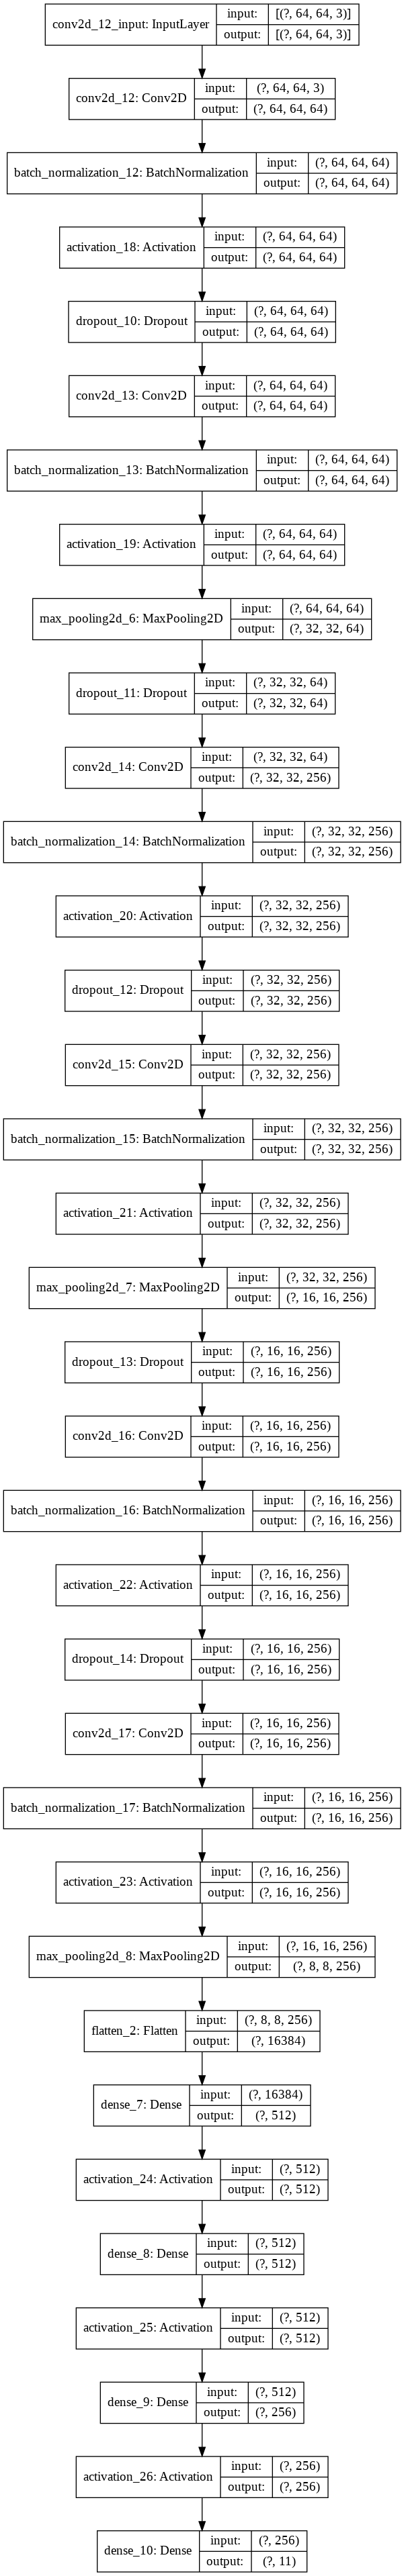

In [ ]:
from tensorflow.keras.utils import  plot_model
plot_model(model, show_shapes=True)

In [ ]:
epochs = 80
checkpoint_filepath = 'model_combinado.h5'

model, history = training(model, checkpoint_filepath, epochs)

Epoch 1/80
139/139 [==============================] - ETA: 0s - loss: 3.0261 - accuracy: 0.2214 - f1_m: 0.1331
Epoch 00001: val_accuracy improved from -inf to 0.21875, saving model to ./drive/My Drive/Colab Notebooks/model_combinado.h5
139/139 [==============================] - 96s 689ms/step - loss: 3.0261 - accuracy: 0.2214 - f1_m: 0.1331 - val_loss: 2.4106 - val_accuracy: 0.2188 - val_f1_m: 0.0000e+00
Epoch 2/80
139/139 [==============================] - ETA: 0s - loss: 1.9152 - accuracy: 0.3105 - f1_m: 0.2978
Epoch 00002: val_accuracy did not improve from 0.21875
139/139 [==============================] - 95s 683ms/step - loss: 1.9152 - accuracy: 0.3105 - f1_m: 0.2978 - val_loss: 2.4058 - val_accuracy: 0.0693 - val_f1_m: 0.0000e+00
Epoch 3/80
139/139 [==============================] - ETA: 0s - loss: 1.7370 - accuracy: 0.3756 - f1_m: 0.3556
Epoch 00003: val_accuracy did not improve from 0.21875
139/139 [==============================] - 95s 681ms/step - loss: 1.7370 - accuracy: 0.3

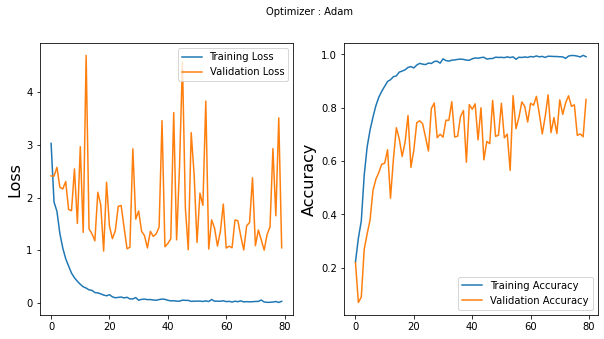

In [ ]:
plotHistory(history)

In [ ]:
evaluate(model)
predict(model)

Loss obtenida para el test: 0.11519233882427216
Accuracy obtenida para el test: 0.983912467956543
f1 score obtenida para el test: 0.9815979599952698
              precision    recall  f1-score   support

           0       0.15      0.15      0.15       261
           1       0.00      0.00      0.00        48
           2       0.20      0.20      0.20       306
           3       0.06      0.06      0.06        50
           4       0.09      0.09      0.09       222
           5       0.06      0.06      0.06       162
           6       0.21      0.21      0.21       307
           7       0.00      0.00      0.00        49
           8       0.04      0.04      0.04        50
           9       0.12      0.12      0.12        49
          10       0.06      0.06      0.06        50

    accuracy                           0.13      1554
   macro avg       0.09      0.09      0.09      1554
weighted avg       0.13      0.13      0.13      1554

